In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [22]:
data.drop(['Status',"unnamed1"],inplace = True,axis = 1)


In [5]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
data.dropna(inplace = True)

In [7]:
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [9]:
data['Amount'] = data['Amount'].astype('int')

# GENDER
        

In [10]:
gen = list(data["Gender"])
fem = gen.count("F")
mal = gen.count("M")
y = [fem,mal]

Text(0.5, 1.0, 'GENDER VS COUNT')

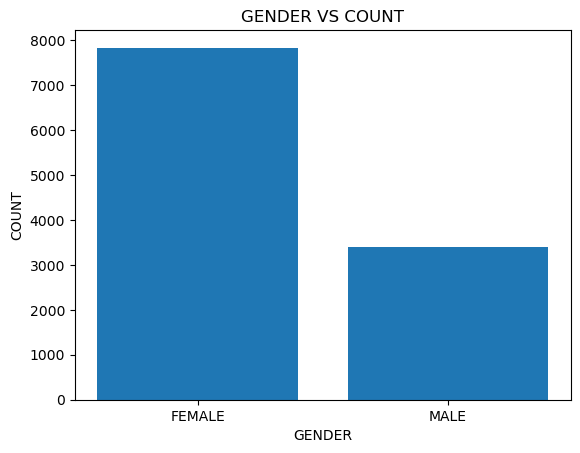

In [233]:
plt.bar(x = ['FEMALE','MALE'], height = y)
plt.xlabel('GENDER')
plt.ylabel("COUNT")
plt.title('GENDER VS COUNT')

In [223]:
dt = data.groupby('Gender')["Amount"].sum()

Text(0.5, 1.0, 'GENDER VS AMOUNT')

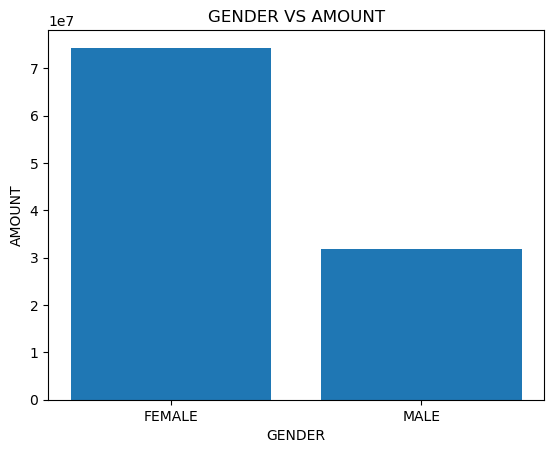

In [232]:
plt.bar(x=['FEMALE','MALE'],height=[dt[0],dt[1]])
plt.xlabel('GENDER')
plt.ylabel("AMOUNT")
plt.title('GENDER VS AMOUNT')

the purchasing number of females is higher than that of man, also the amount spent by females is much higher than that of males

# AGE

In [226]:
dc = dict(data.groupby('Age Group')['Gender'].sum())
l2 = [dc['0-17'].count("M"),dc['18-25'].count("M"),dc['26-35'].count("M"),dc['36-45'].count("M"),dc['46-50'].count("M"),dc['51-55'].count("M"),dc['55+'].count("M")]
l1 = [dc['0-17'].count("F"),dc['18-25'].count("F"),dc['26-35'].count("F"),dc['36-45'].count("F"),dc['46-50'].count("F"),dc['51-55'].count("F"),dc['55+'].count("F")]

In [227]:
x1 =x2= ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

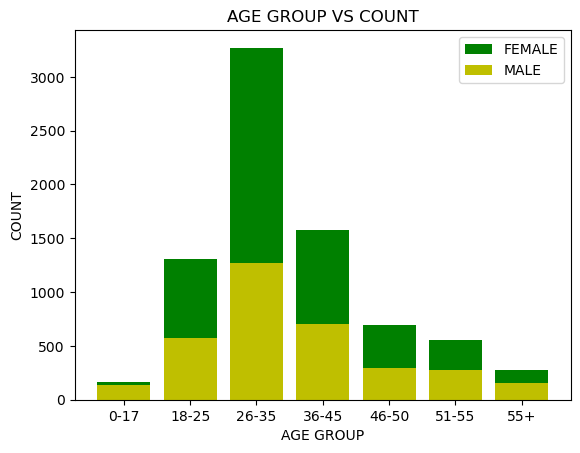

In [231]:
plt.bar(x1,l1,color='g')
plt.bar(x2,l2,color = 'y')
plt.xlabel('AGE GROUP')
plt.ylabel("COUNT")
plt.title('AGE GROUP VS COUNT')
plt.legend(labels=['FEMALE',"MALE"])
plt.show()

In [239]:
dd = list(data.groupby("Age Group")["Orders"].sum())
dd

[690, 4650, 11398, 5697, 2379, 2116, 1077]

Text(0.5, 1.0, 'AGE GROUP VS ORDERS')

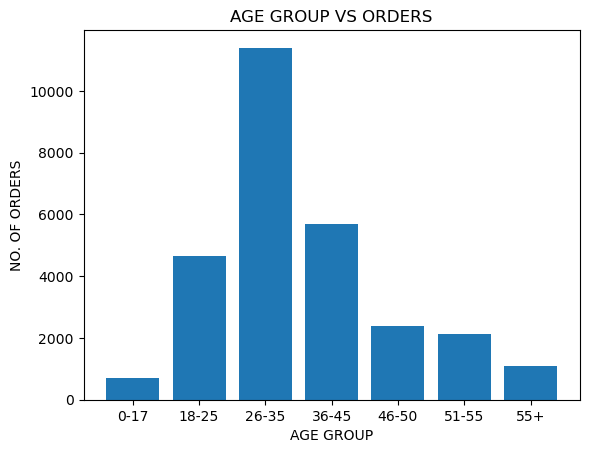

In [240]:
#total orders vs agr group
plt.bar(x1,dd)
plt.xlabel('AGE GROUP')
plt.ylabel("NO. OF ORDERS")
plt.title('AGE GROUP VS ORDERS')

In [18]:
#total amount vs age group
dt2 = list(data.groupby("Age Group")["Amount"].sum())
            

[2699653.0,
 17240732.0,
 42613443.94,
 22144995.49,
 9207844.0,
 8261477.0,
 4080987.0]

Text(0.5, 1.0, 'AGE GROUP VS AMOUNT')

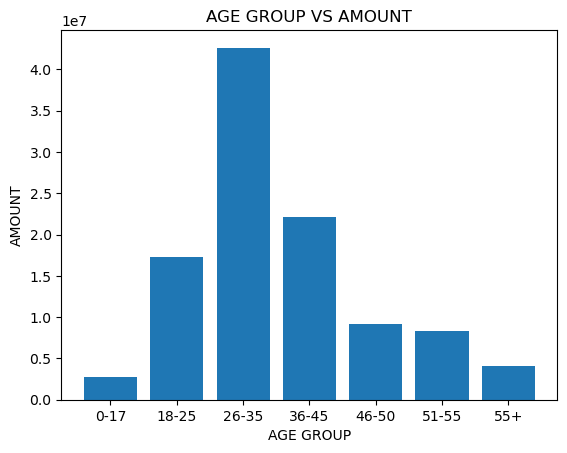

In [241]:
#total amount vs age group
plt.bar(x1,dt2)
plt.xlabel('AGE GROUP')
plt.ylabel("AMOUNT")
plt.title('AGE GROUP VS AMOUNT')

females of age group (26-35) have highest purchases,orders(in numbers),highest purchasing amount followed by the same stats in the age group 36-45 BUT WITH A HUGE DIFFRENCE

# STATE

In [242]:
#state vs total orders
st_od =data.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending=False).head(10)

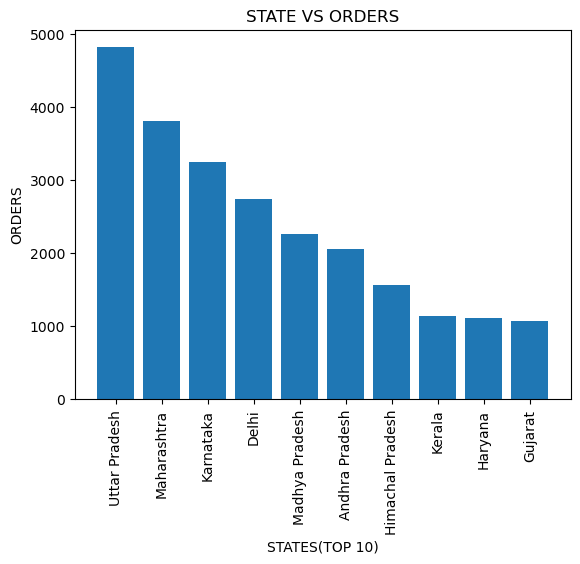

In [244]:
plt.bar(st_od['State'],st_od['Orders'])
plt.xticks(rotation = 90)
plt.xlabel('STATES(TOP 10)')
plt.ylabel("ORDERS")
plt.title('STATE VS ORDERS')
plt.show()

In [245]:
#state vs amount
st_amt = data.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = "Amount", ascending = False).head(10)

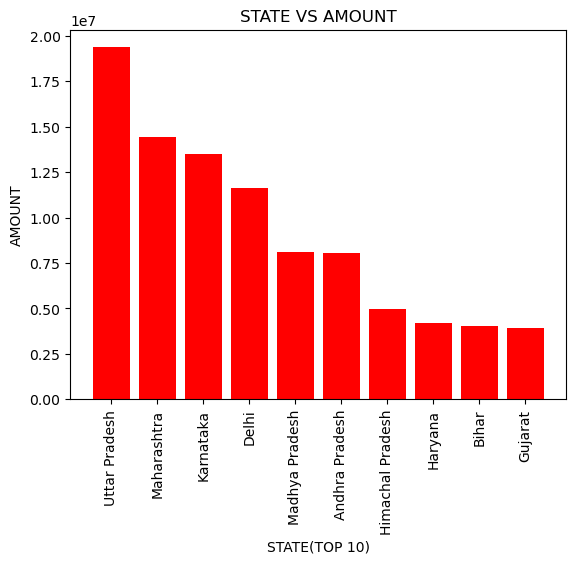

In [246]:
plt.bar(st_amt['State'],st_amt['Amount'],color = 'r')
plt.xticks(rotation = 90)
plt.xlabel('STATE(TOP 10)')
plt.ylabel("AMOUNT")
plt.title('STATE VS AMOUNT')
plt.show()

most number of orders along with the highest total amount is from UP,MAHARASHTRA & KARNATAKA  respectively

# MARITIAL STATUS 

In [247]:
#maritial status vs count by gender
status = ["UNMARRIED","MARRIED"]
f = dict(data.groupby('Marital_Status')['Gender'].sum())
lt1 = [f[0].count("F"),f[1].count("F")]
lt2 = [f[0].count("M"),f[1].count("M")]

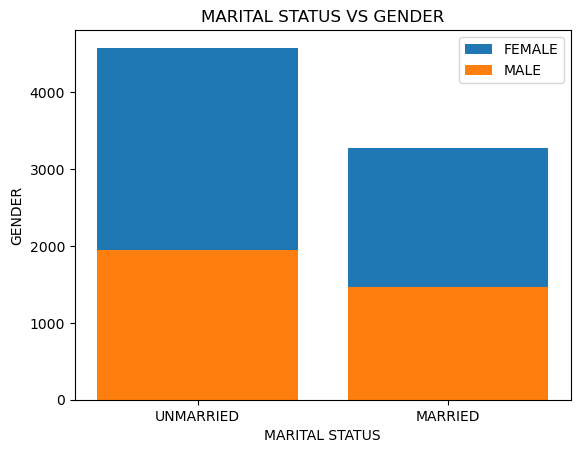

In [250]:
plt.bar(status,lt1)
plt.bar(status,lt2)
plt.xlabel('MARITAL STATUS')
plt.ylabel("GENDER")
plt.title('MARITAL STATUS VS GENDER')
plt.legend(labels=['FEMALE',"MALE"])

In [128]:
#marital status vs amount"
mr_amt = data.groupby(["Marital_Status","Gender"],as_index = False)["Amount"].sum()

amt_unmr = [mr_amt["Amount"][0],mr_amt["Amount"][2]]
amt_mr = [mr_amt["Amount"][1],mr_amt["Amount"][3]]
mr_amt

,Marital_Status,Gender,Amount
0,0,F,43786648.44
1,0,M,18338738.00
2,1,F,30549207.99
3,1,M,13574538.00


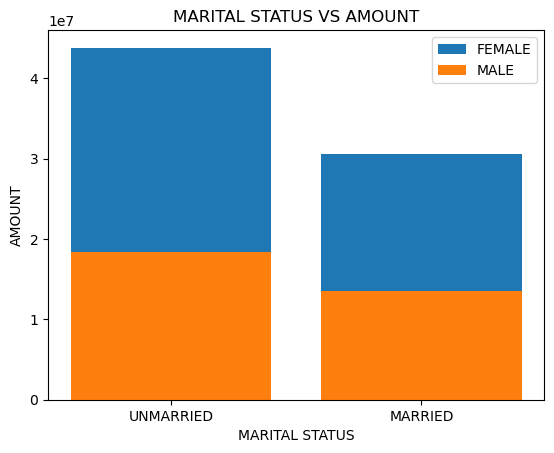

In [249]:
plt.bar(status,amt_unmr)
plt.bar(status,amt_mr)
plt.xlabel('MARITAL STATUS')
plt.ylabel("AMOUNT")
plt.title('MARITAL STATUS VS AMOUNT')
plt.legend(labels=['FEMALE',"MALE"])

# OCCUPATION

In [251]:
#ocupation vs amount
occ_amt = data.groupby(["Occupation"],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

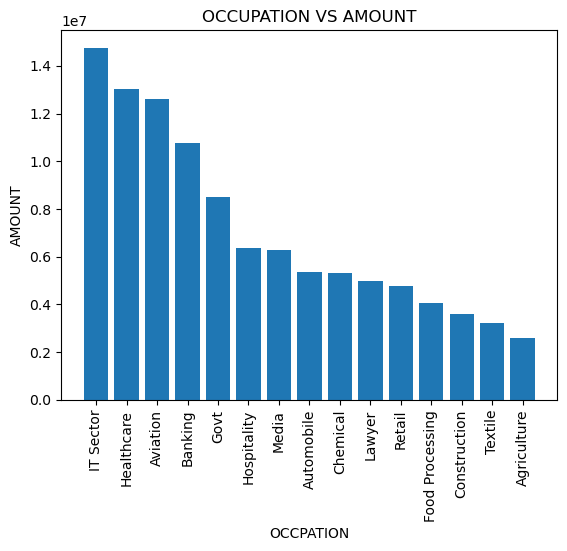

In [252]:
plt.bar(occ_amt['Occupation'],occ_amt['Amount'])
plt.xticks(rotation = 90)
plt.xlabel('OCCPATION')
plt.ylabel("AMOUNT")
plt.title('OCCUPATION VS AMOUNT')
plt.show()

In [199]:
#occupation vs count
un = data["Occupation"].unique()
lt = list(data["Occupation"])
occ_count = []
def ct(u,i,em):
    for x in u:
        p = i.count(x)
        em.append(p)
ct(un,lt,occ_count)
        

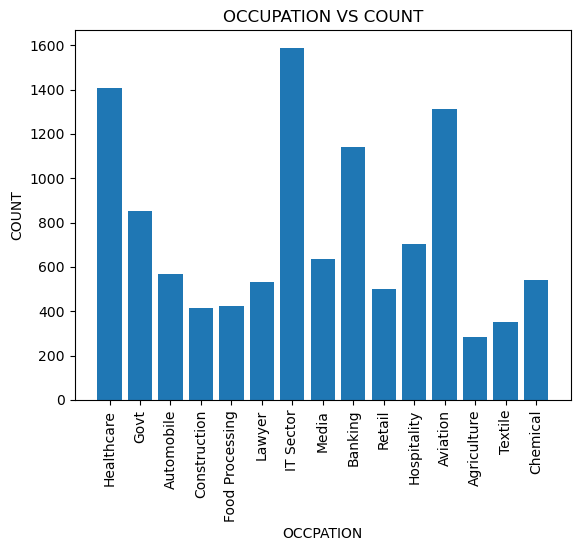

In [253]:
g= np.arange(1,16,1)
plt.bar(un,occ_count)
plt.xticks(rotation = 90)
plt.xlabel('OCCPATION')
plt.ylabel("COUNT")
plt.title('OCCUPATION VS COUNT')


plt.show()

from above graphs it can be seen that most of the purchases in count and amount are highest in IT, Healthcare and Aviation

# PRODUCT CATEGORY

In [202]:
#pc vs count
pc_un = data['Product_Category'].unique()
pc_lt = list(data['Product_Category'])
pc_em =[]
ct(pc_un,pc_lt,pc_em)

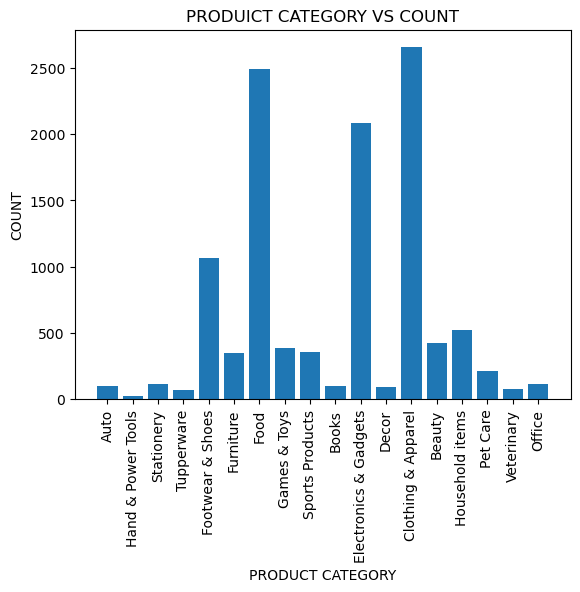

In [254]:
plt.bar(pc_un,pc_em)
plt.xticks(rotation = 90)
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel("COUNT")
plt.title('PRODUICT CATEGORY VS COUNT')
plt.show()

In [255]:
#amt vs pc
pc_amt = data.groupby(["Product_Category"],as_index = False)['Amount'].sum().sort_values(by="Amount",ascending = False)

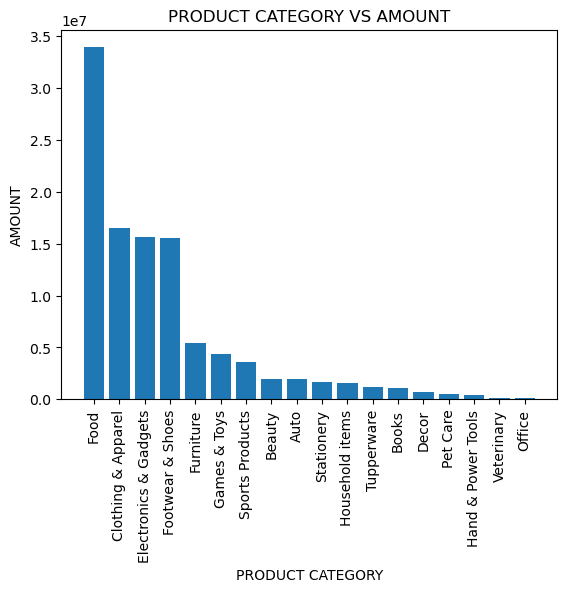

In [256]:
plt.bar(pc_amt['Product_Category'],pc_amt["Amount"])
plt.xticks(rotation=90)
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel("AMOUNT")
plt.title('PRODUCT CATEGORY VS AMOUNT')
plt.show()

In [257]:
#ord bs pc
pc_ord = data.groupby(["Product_Category"],as_index = False)["Orders"].sum().sort_values(by = 'Orders',ascending=False)

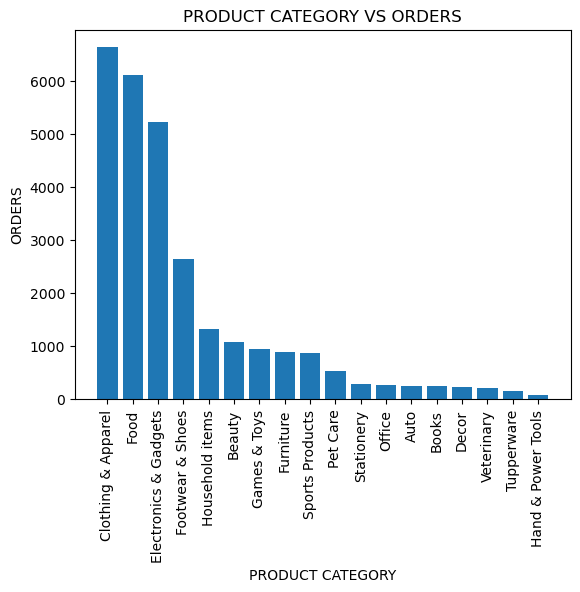

In [258]:
plt.bar(pc_ord['Product_Category'],pc_ord['Orders'])
plt.xticks(rotation=90)
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel("ORDERS")
plt.title('PRODUCT CATEGORY VS ORDERS')
plt.show()

from above three graphs it is clear that highest number of purchases based on:-
number of orders is for CLOTHING AND APPAREL
highest amount spent on purchase is for FOOD
whereas the highest number ofcustomers was for CLOTHING AND APPAREL followed by FOOD with a LITTLE DIFFRENCE

# CONCLUSION

unmarried females of age group 26-36 from UP, MAHARASHTRA & KARNATAKA wroking in IT, HEALTHCARE & AVIATION are the highest purchaser on this DIWALI. They were highly intersted in CLOTHINGS & APPAREL, FOOD and spent a good amount on these products